In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

C:\Users\rpa49\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ImportError: DLL load failed while importing _c_internal_utils: The specified module could not be found.

In [ ]:
# Read Files
df = pd.read_excel('risks2.xlsx')
feature_importances_df = pd.read_excel('feature_importance_rf.xlsx')

features = feature_importances_df['Feature'].values

# Get feature importances from your Random Forest model
importances = rf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Define the number of top features to select
num_features = 32

# Get the names of the top features
top_features = [X_test_df.columns[i] for i in indices[:num_features]]

# Create a new DataFrame with only the top features
X_top_features = X_test_df[top_features]

# Scale your data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top_features)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# Optionally, determine the optimal number of clusters using the Silhouette score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

# Specify the number of clusters (k) you want to find
# You can choose the value of k based on the Elbow method or Silhouette score
k = 3

# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X_scaled)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add the cluster assignments to your DataFrame
X_test_df['Cluster'] = cluster_assignments

# Export the DataFrame to a spreadsheet
X_test_df.to_excel('risks2.xlsx', index=False)


In [197]:
# Assuming `rf` is your trained RandomForestClassifier
feature_importances = rf.feature_importances_

# Assuming `feature_names` is a list of your feature names
feature_importances_df = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importance': feature_importances
})

# You can then sort the DataFrame to see the features with the highest importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
features = feature_importances_df['Feature'].values

# Save the merged DataFrame to a new Excel file
feature_importances_df.to_excel('feature_importance_rf.xlsx', index=False)


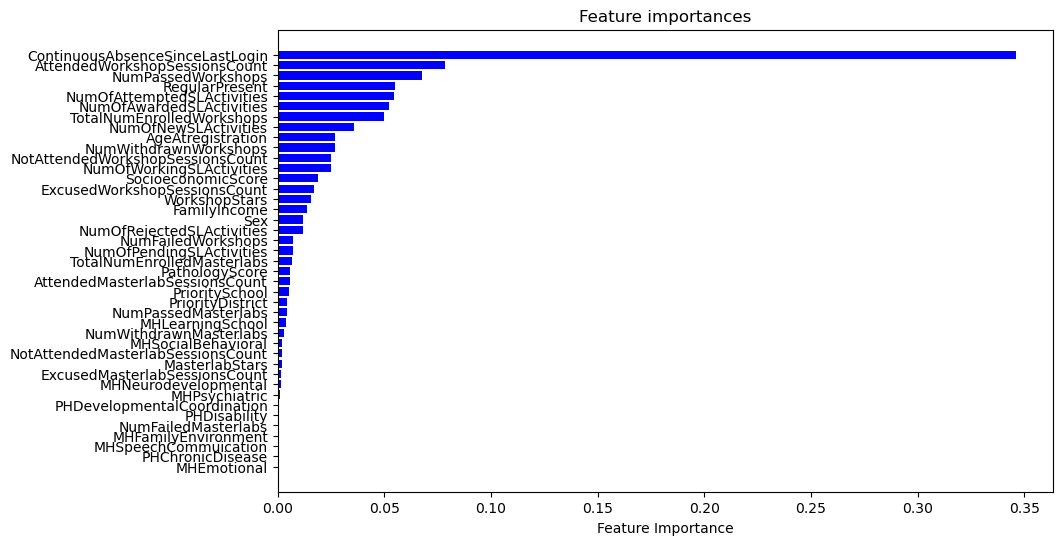

In [198]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='b', align='center')
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig('../visualizations/featureimp-random-forest.png', bbox_inches='tight')

plt.show()

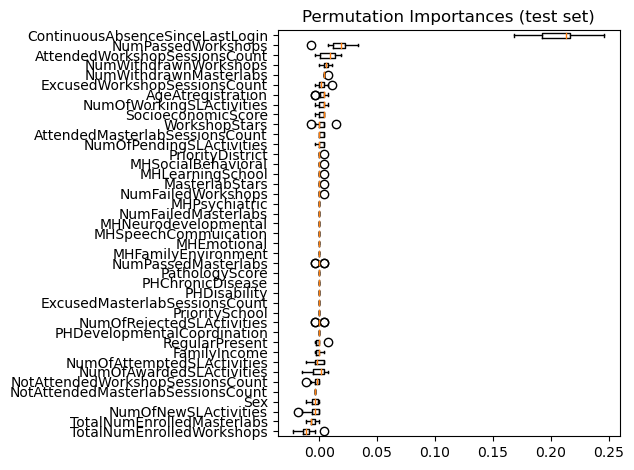

In [200]:
# Feature Importance (Permutation)
result = permutation_importance(rf, X_test, y_test, n_repeats=10)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

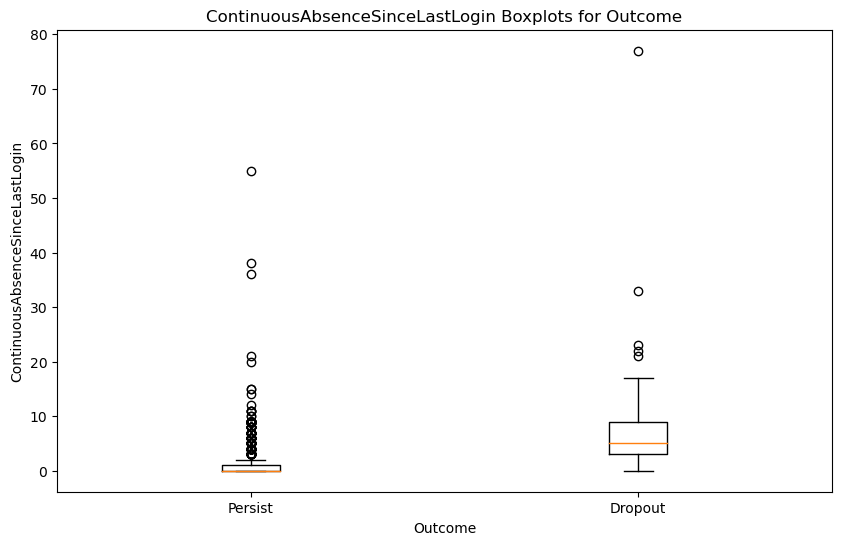

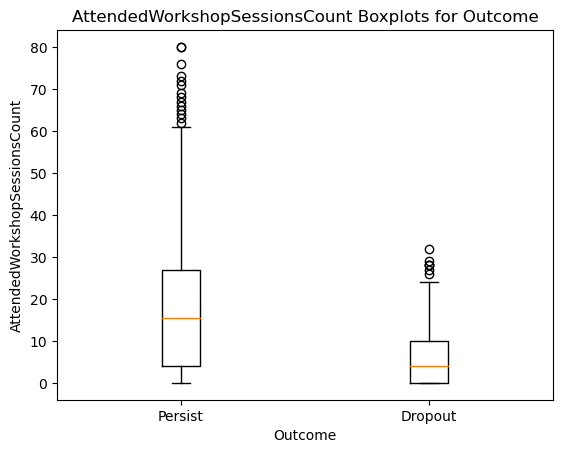

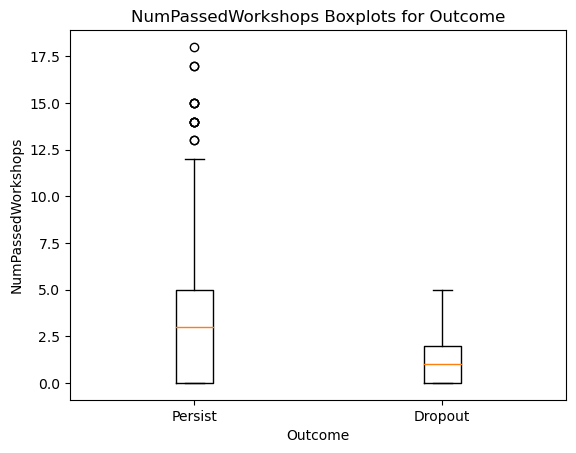

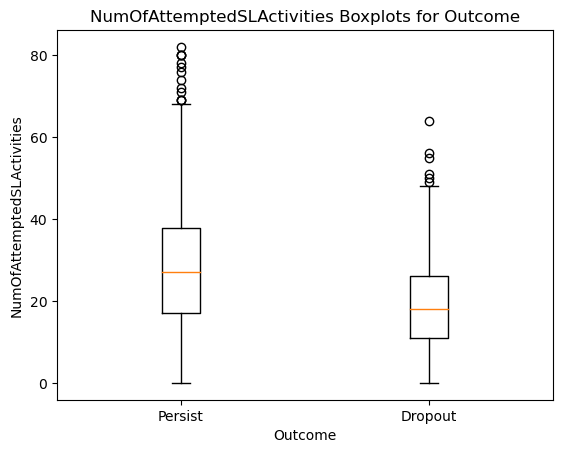

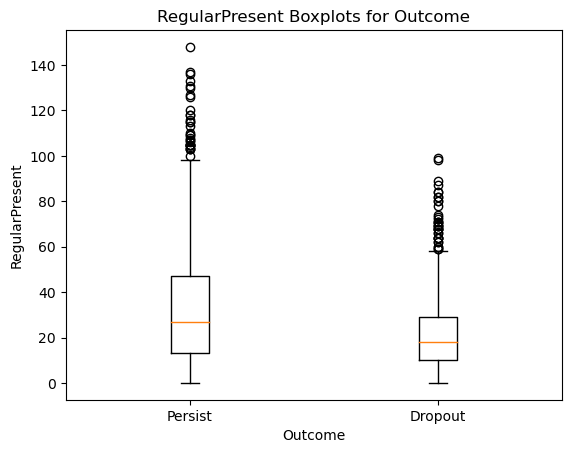

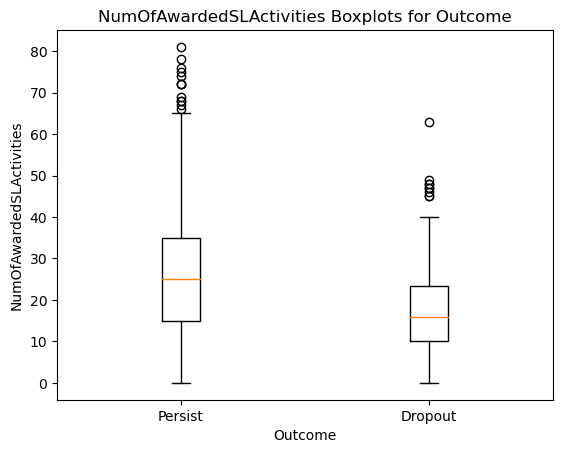

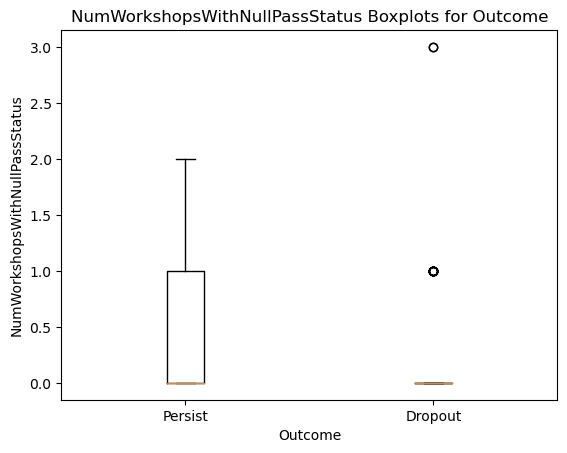

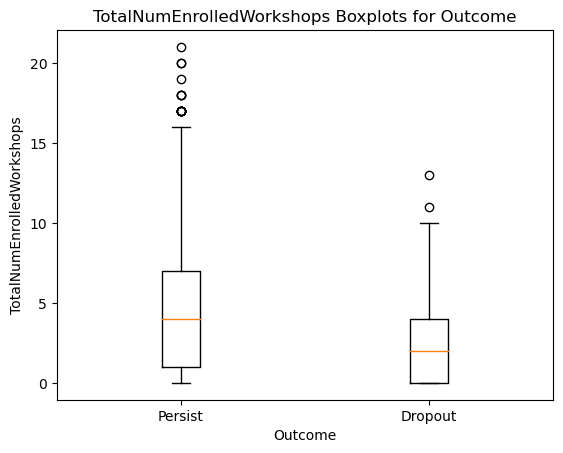

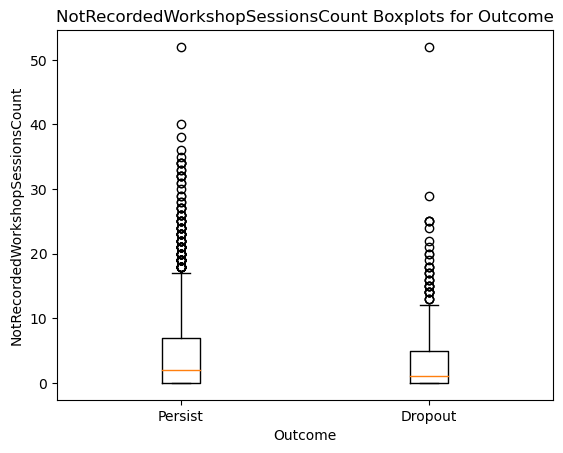

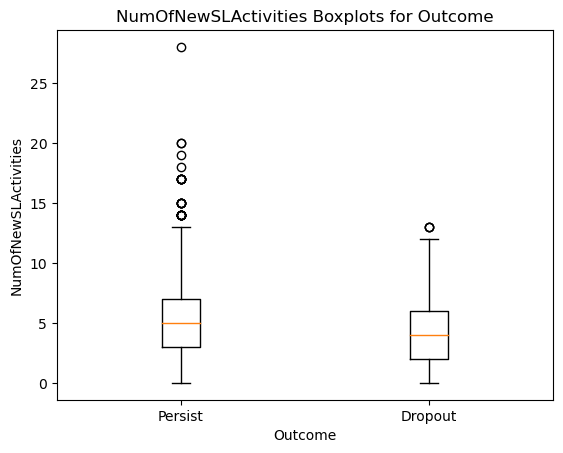

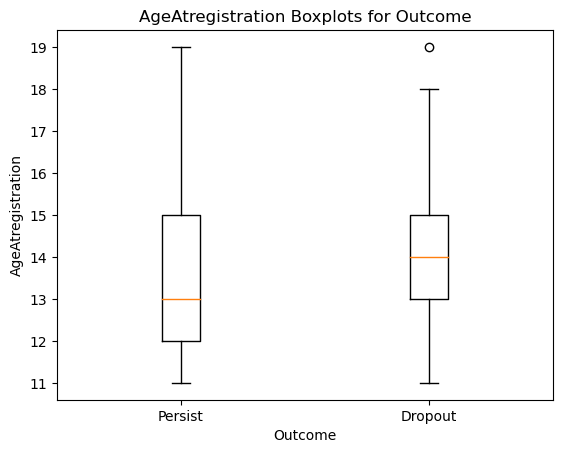

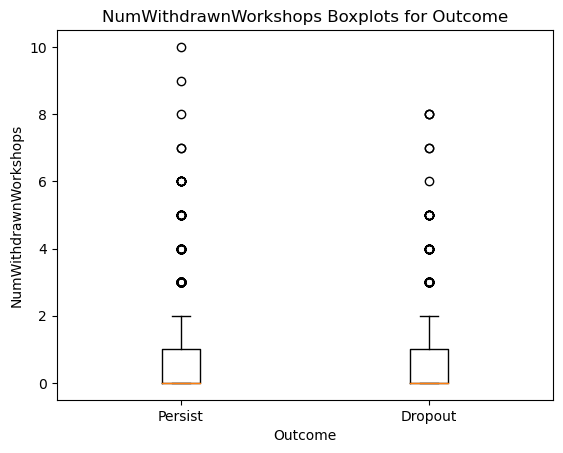

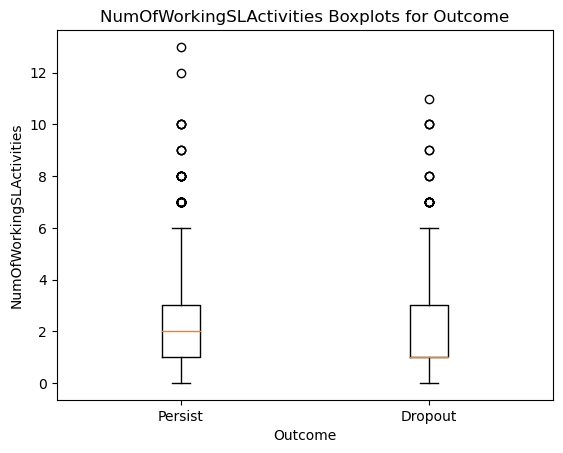

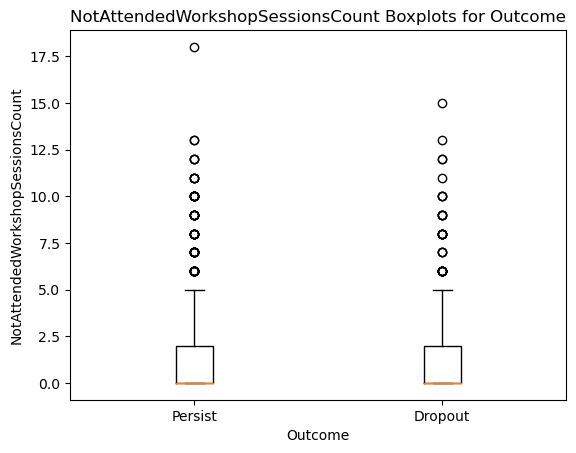

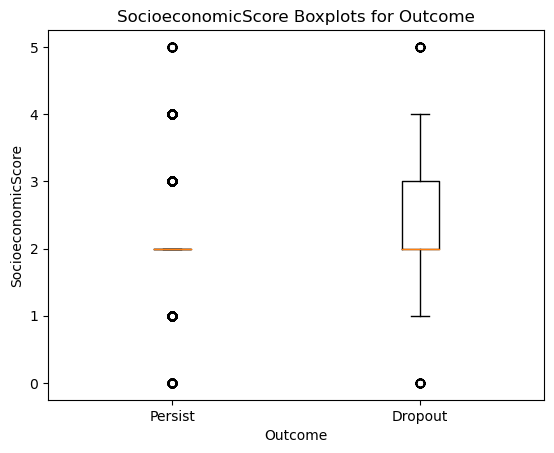

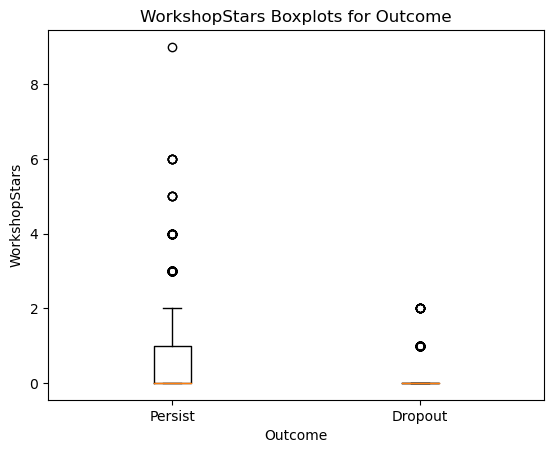

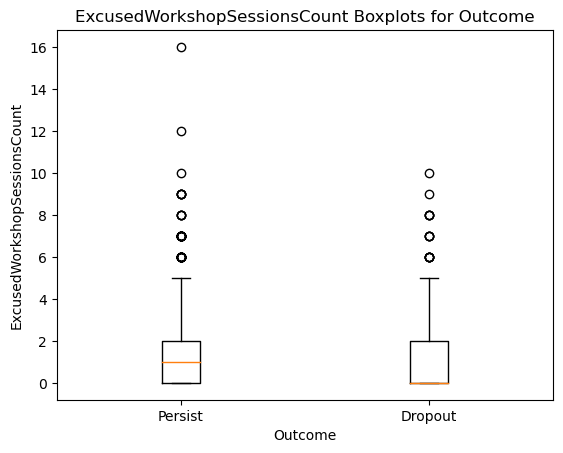

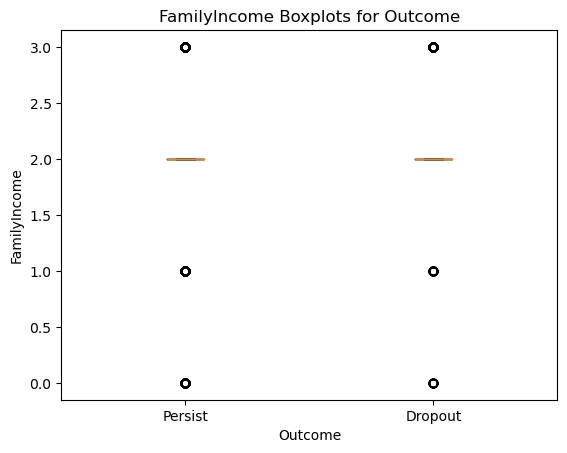

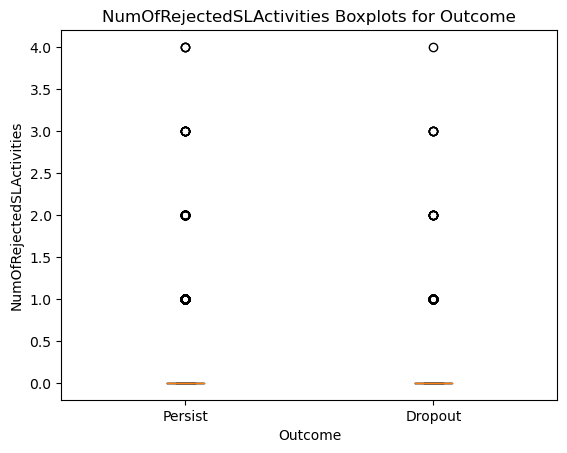

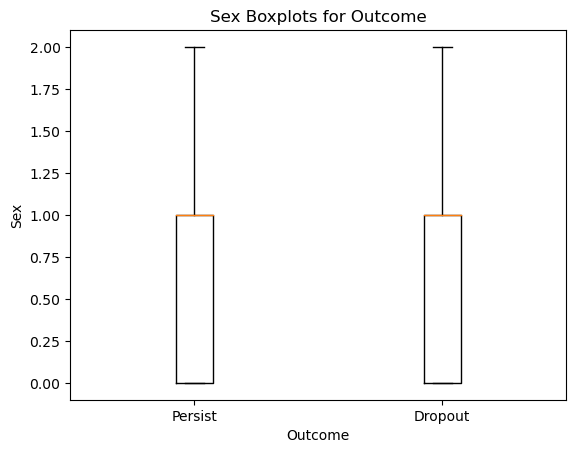

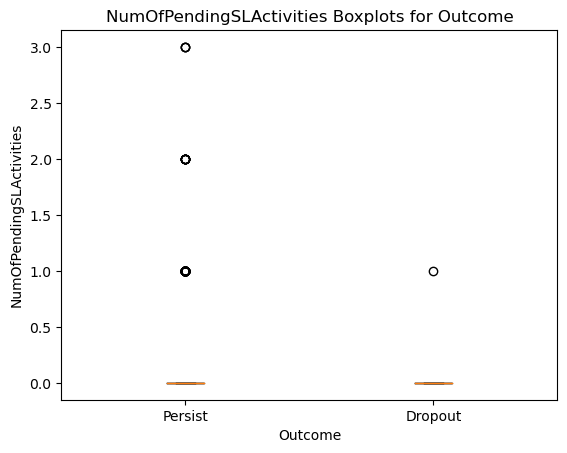

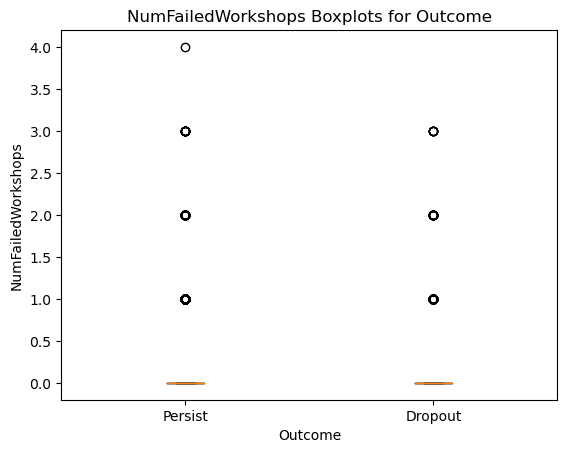

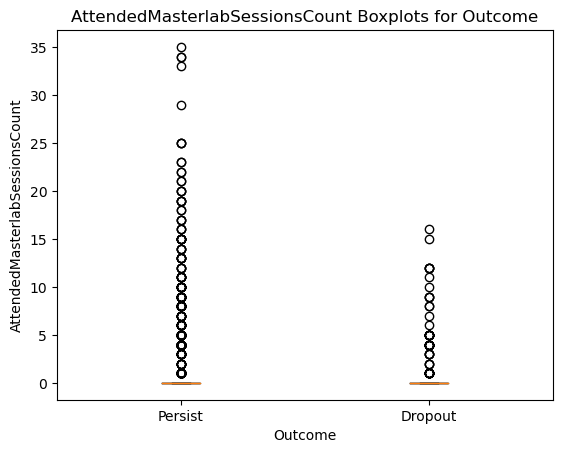

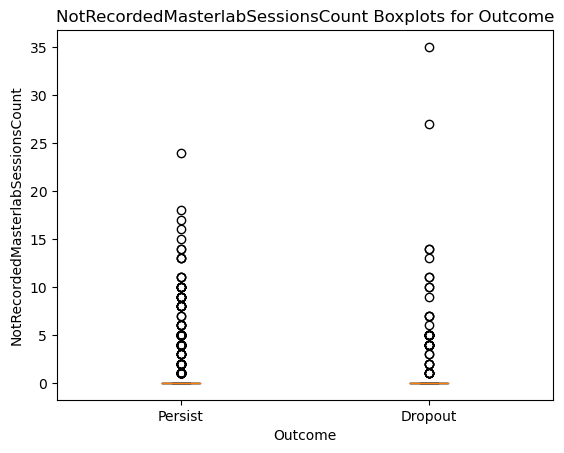

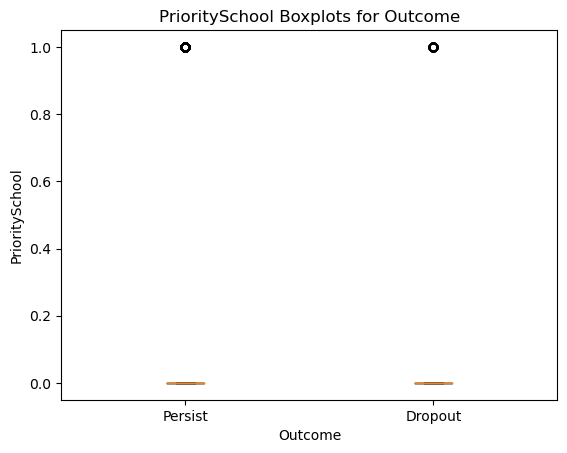

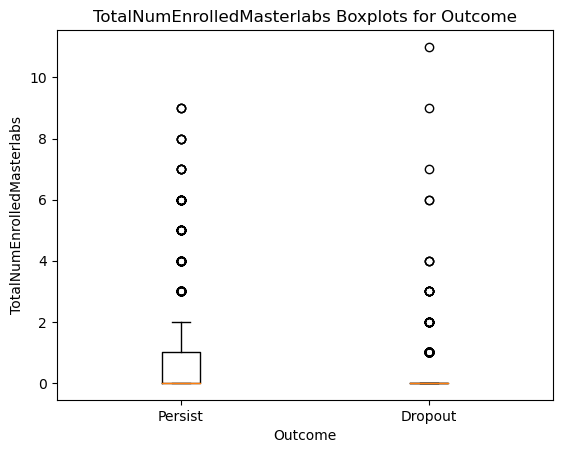

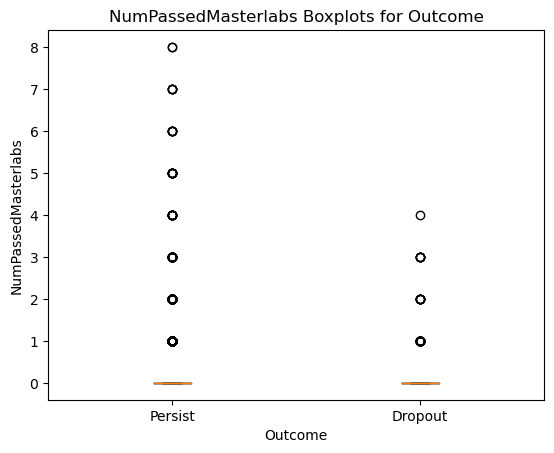

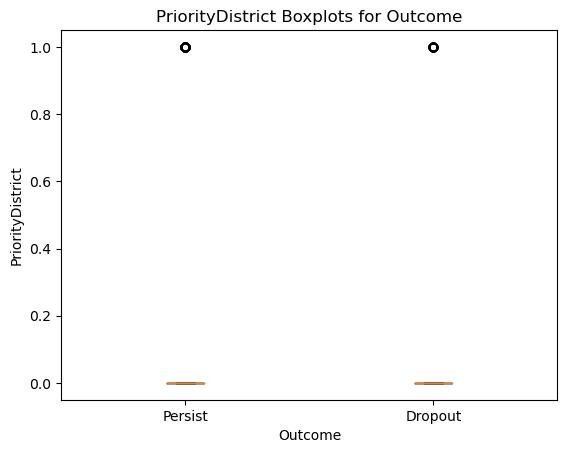

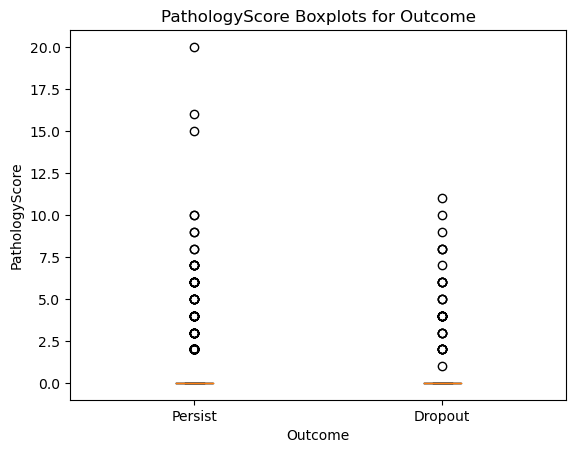

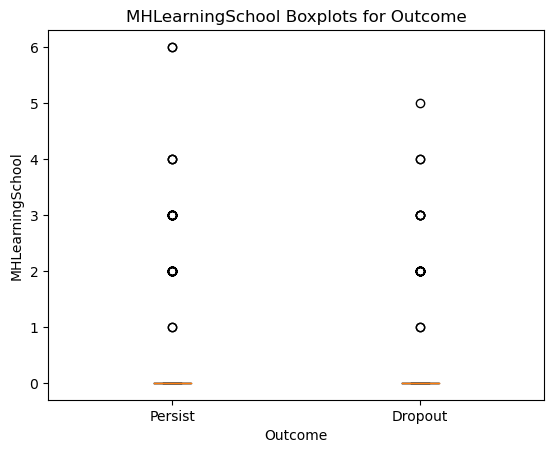

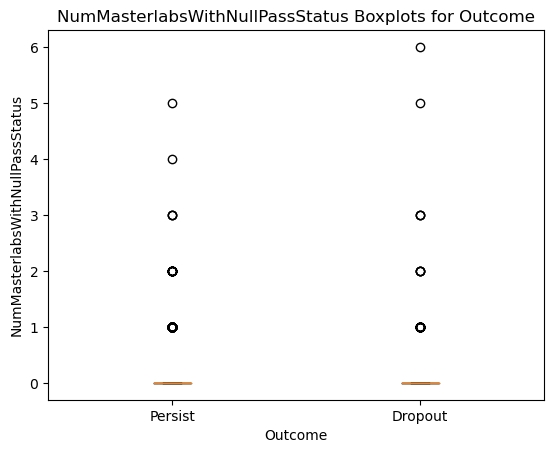

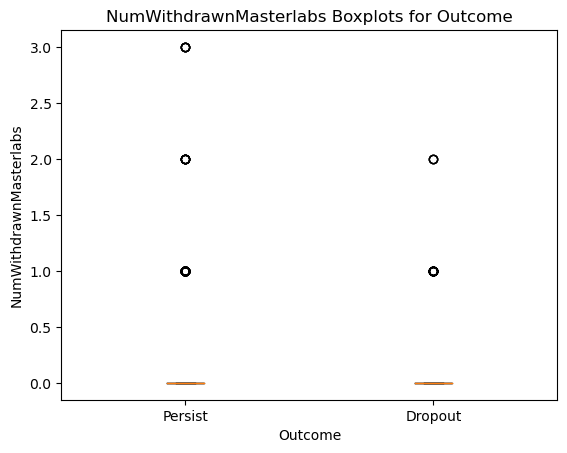

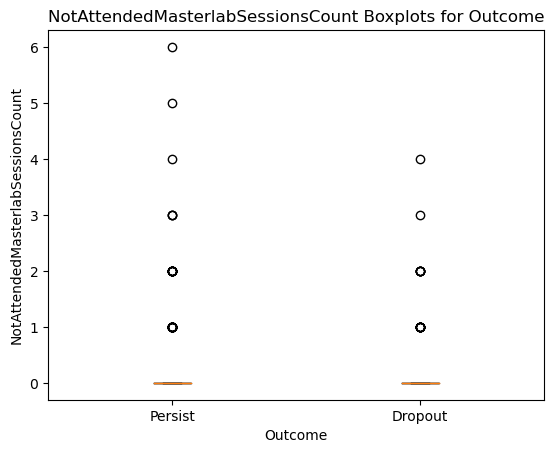

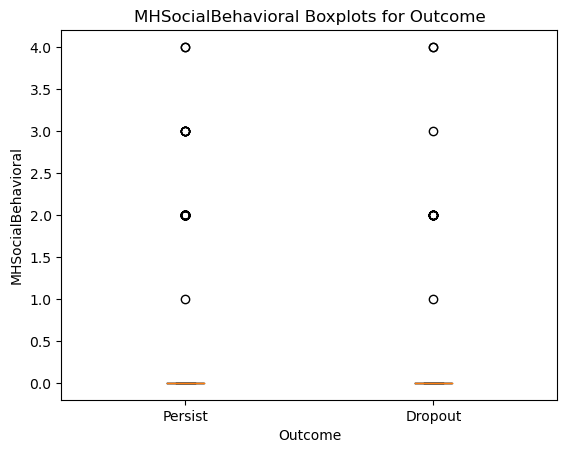

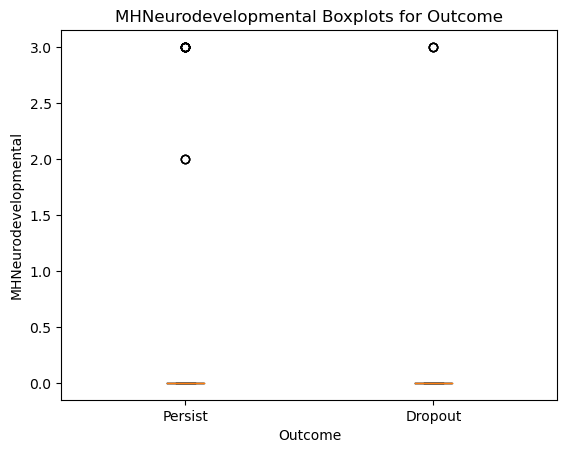

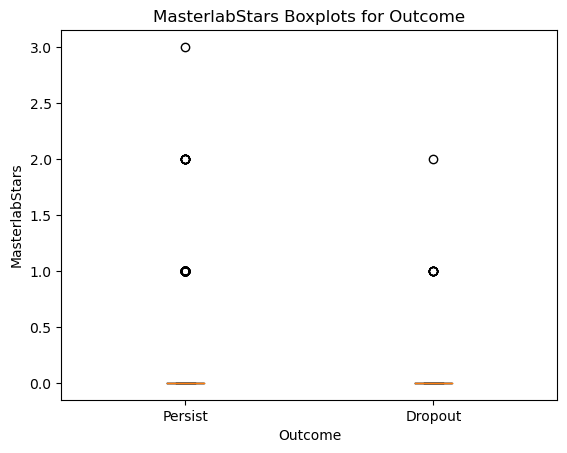

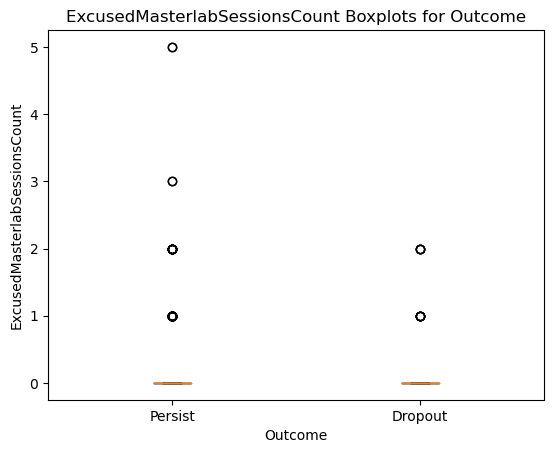

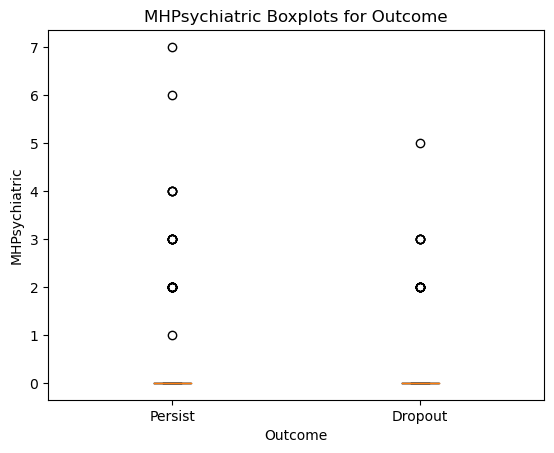

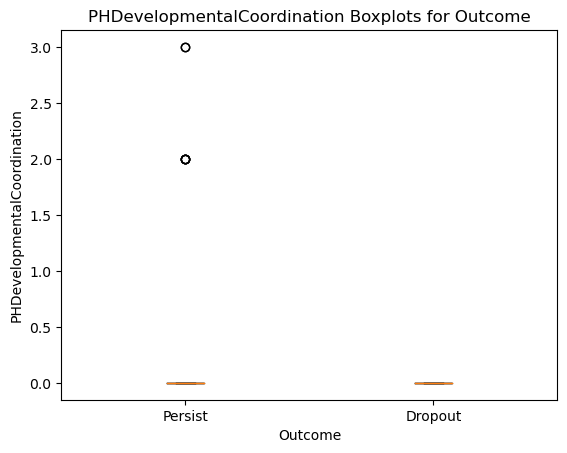

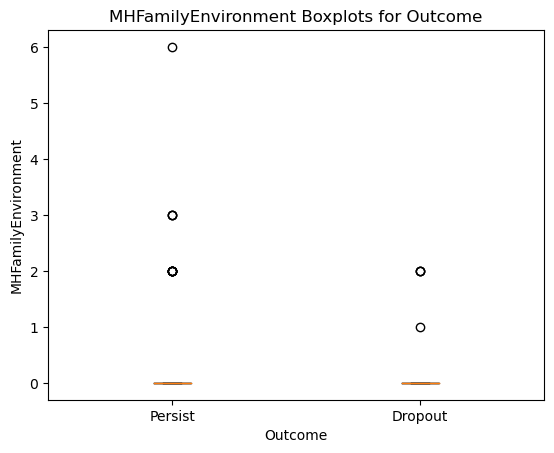

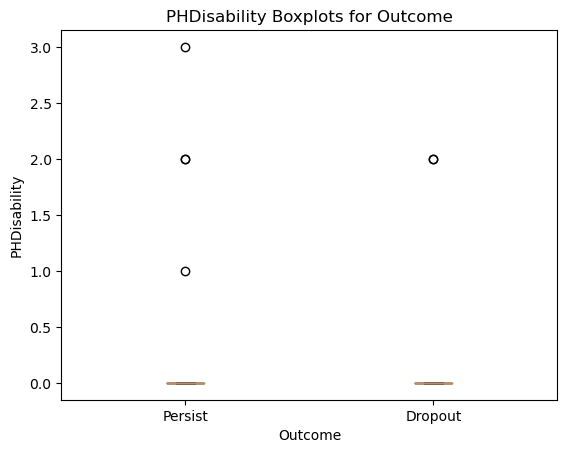

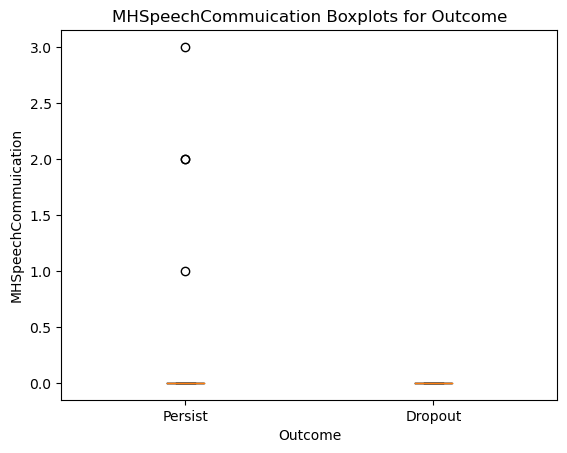

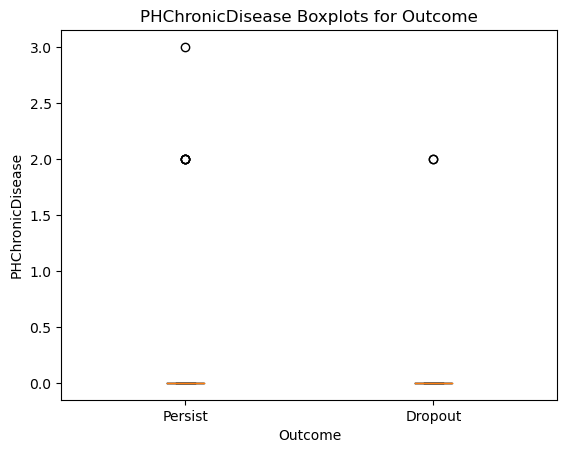

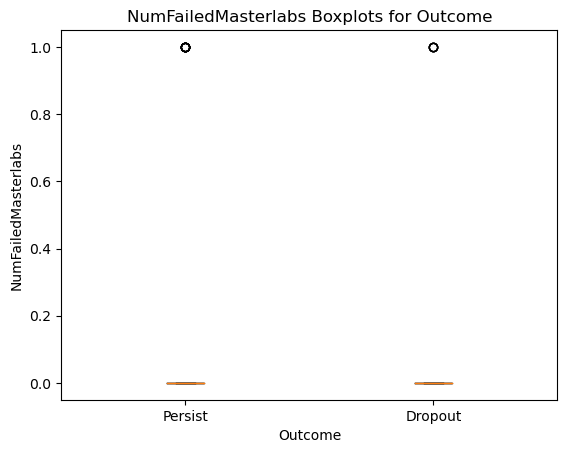

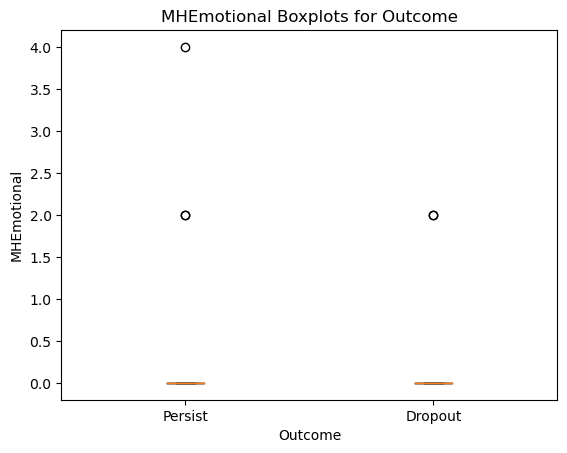

In [153]:
# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in features:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Dropout'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Outcome')
    plt.show()

In [201]:
probabilities = rf.predict_proba(X_test)

# The probabilities of the positive class (dropped out)
dropout_probabilities = probabilities[:, 1]

feature_names = X.columns.tolist()

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Add the probabilities as a new column
X_test_df['DroppedOut_Probability'] = dropout_probabilities

# Export the DataFrame to a spreadsheet
X_test_df.to_excel('risks2.xlsx', index=False)

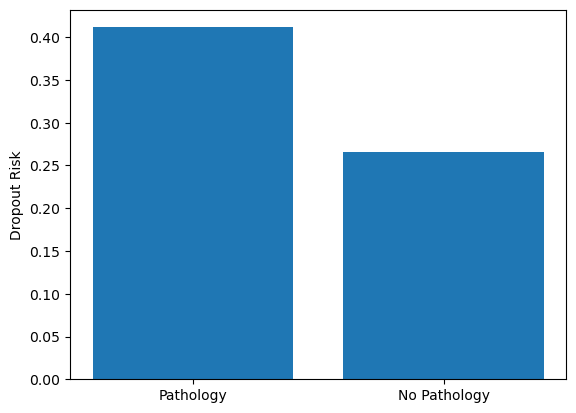

0.4115384615384615
0.266156862745098


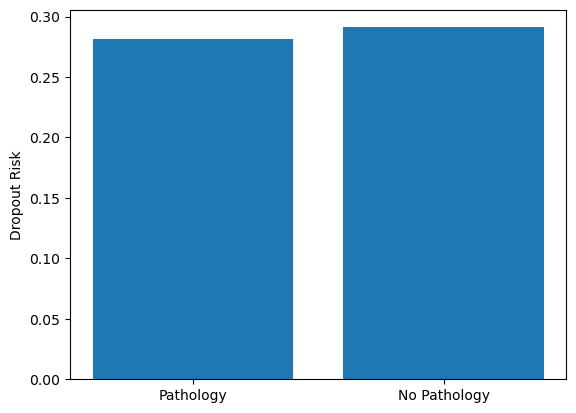

0.28131944444444446
0.29113659022931204


In [157]:
probabilities = rf.predict_proba(X_predictors)

# The probabilities of the positive class (dropped out)
dropout_probabilities = probabilities[:, 1]

feature_names = X.columns.tolist()

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_predictors, columns=feature_names)

# Add the probabilities as a new column
X_test_df['DroppedOut_Probability'] = dropout_probabilities

# Export the DataFrame to a spreadsheet
# X_test_df.to_excel('risks2.xlsx', index=False)

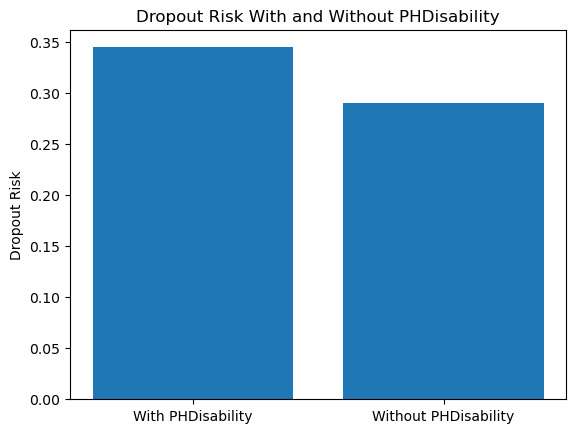

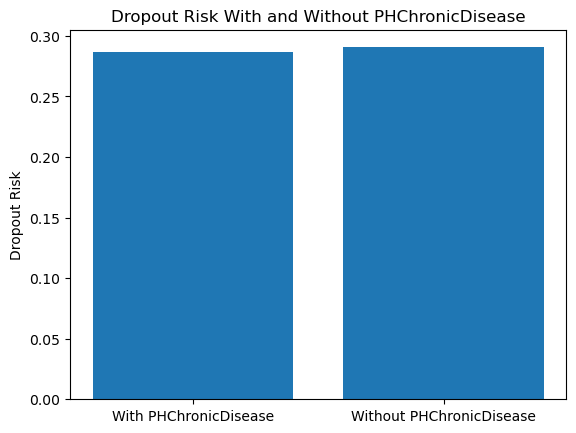

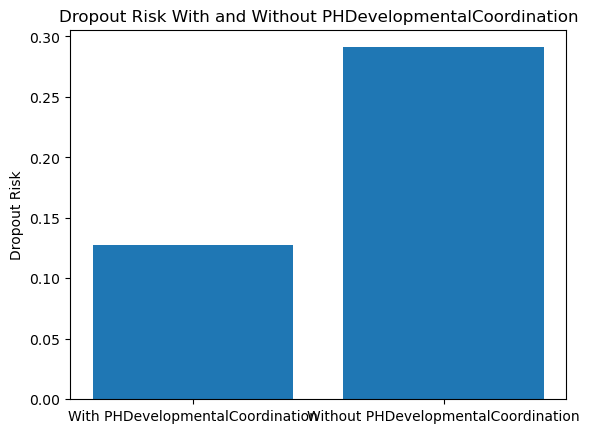

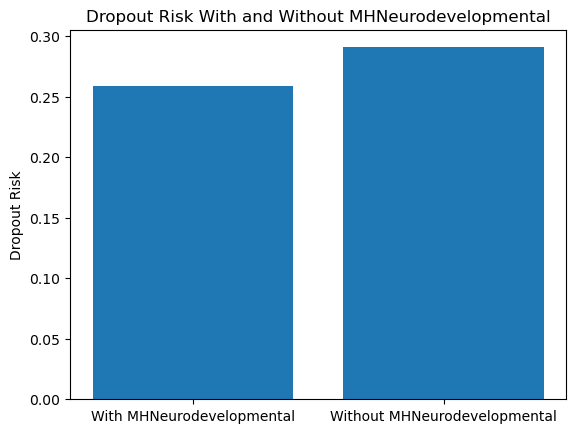

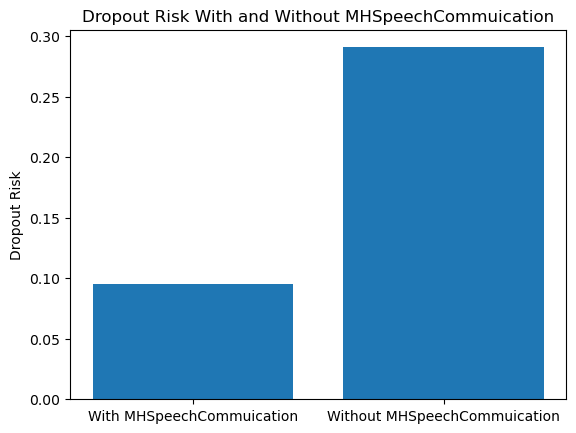

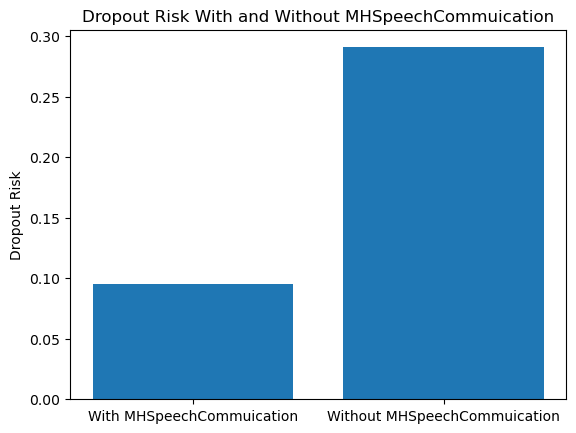

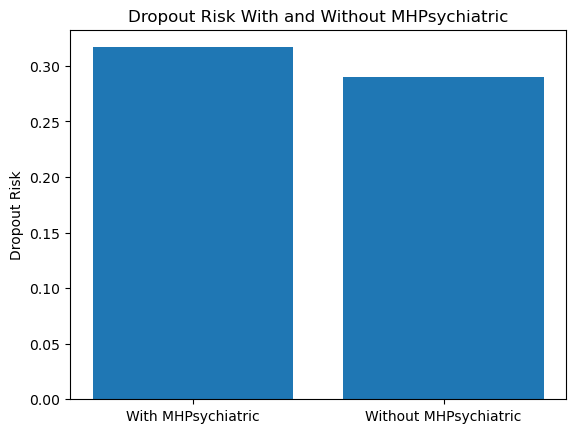

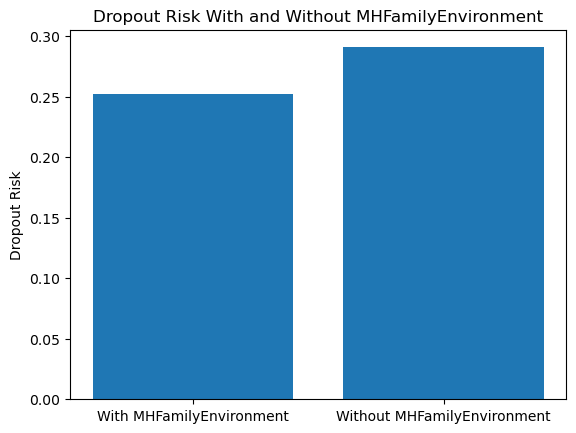

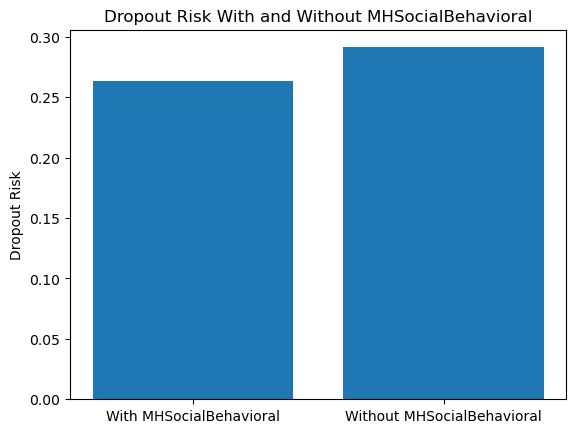

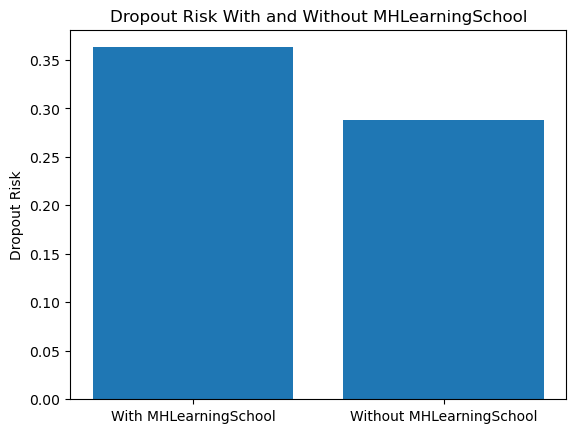

In [159]:
# Define your list of predictors
predictors = ['PHDisability', 'PHChronicDisease', 'PHDevelopmentalCoordination', 'MHNeurodevelopmental', 'MHSpeechCommuication', 'MHSpeechCommuication', 'MHPsychiatric', 'MHFamilyEnvironment', 'MHSocialBehavioral', 'MHLearningSchool']  # replace with your actual predictors

for predictor in predictors:
    # Calculate dropout risks for each group
    risk_with_predictor = X_test_df[X_test_df[predictor] > 0]['DroppedOut_Probability'].mean()
    risk_without_predictor = X_test_df[X_test_df[predictor] == 0]['DroppedOut_Probability'].mean()

    # Create bar plot
    plt.figure()  # create a new figure for each predictor
    plt.bar([f'With {predictor}', f'Without {predictor}'], [risk_with_predictor, risk_without_predictor])
    plt.ylabel('Dropout Risk')
    plt.title(f'Dropout Risk With and Without {predictor}')
    plt.show()


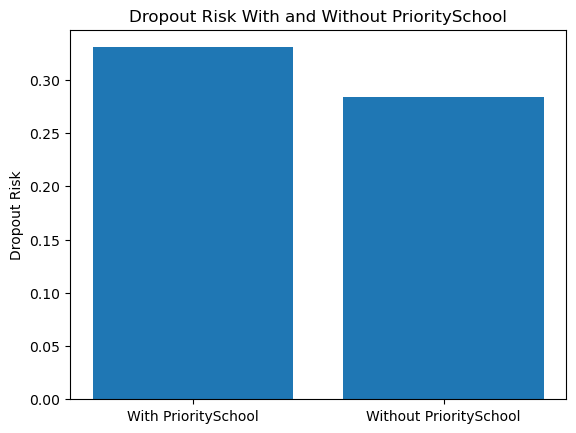

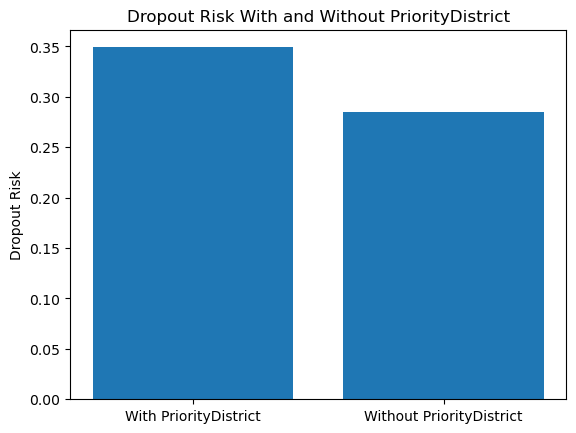

In [160]:
# Define your list of predictors
predictors = ['PrioritySchool', 'PriorityDistrict']  # replace with your actual predictors

for predictor in predictors:
    # Calculate dropout risks for each group
    risk_with_predictor = X_test_df[X_test_df[predictor] > 0]['DroppedOut_Probability'].mean()
    risk_without_predictor = X_test_df[X_test_df[predictor] == 0]['DroppedOut_Probability'].mean()

    # Create bar plot
    plt.figure()  # create a new figure for each predictor
    plt.bar([f'With {predictor}', f'Without {predictor}'], [risk_with_predictor, risk_without_predictor])
    plt.ylabel('Dropout Risk')
    plt.title(f'Dropout Risk With and Without {predictor}')
    plt.show()

In [ ]:
# Calculate dropout risks for family income groups

under800 = X_test_df[X_test_df['FamilyIncome'] == 3]['DroppedOut_Probability'].mean()
from801to1300 = X_test_df[X_test_df['FamilyIncome'] == 2]['DroppedOut_Probability'].mean()
from1301to2500 = X_test_df[X_test_df['FamilyIncome'] == 1]['DroppedOut_Probability'].mean()
over2500 = X_test_df[X_test_df['FamilyIncome'] == 0]['DroppedOut_Probability'].mean()

# Create bar plot
plt.bar(['Under 800€', '801€ to 1300€', '1301€ to 2500€', 'Over 2500'], [under800, from801to1300, from1301to2500, over2500])
plt.ylabel('Dropout Risk')
plt.title(f'Dropout Risk by Family Income')
plt.show()

In [ ]:
# Plot Socioeconomic variation with Dropout Risk

# Group by 'SocioeconomicScore' and calculate mean 'DroppedOut_Probability'
grouped = X_test_df.groupby('SocioeconomicScore')['DroppedOut_Probability'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Mean Dropout Risk vs. Socioeconomic Score')
plt.xlabel('Socioeconomic Score')
plt.ylabel('Mean Dropout Risk')
plt.xticks(range(6))  # Ensure all scores from 0 to 5 are shown on the x-axis
plt.grid(True)
plt.show()


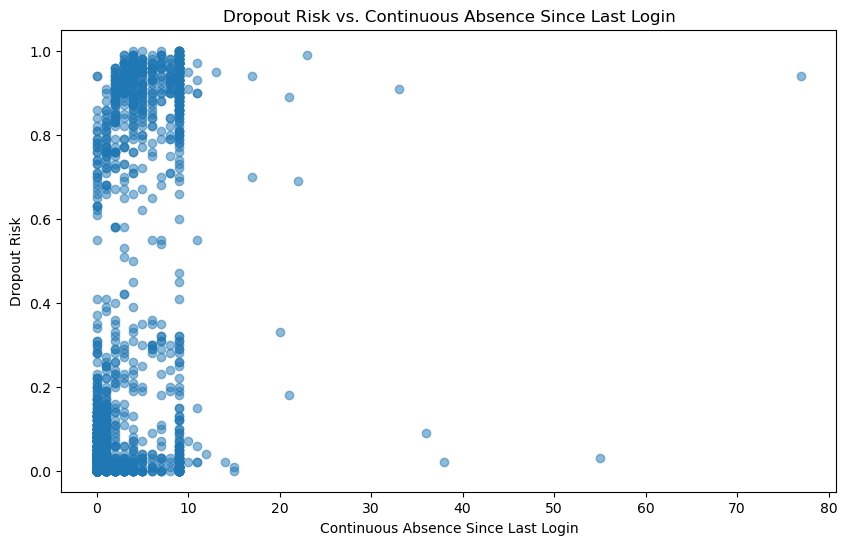

In [161]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_df['ContinuousAbsenceSinceLastLogin'], X_test_df['DroppedOut_Probability'], alpha=0.5)
plt.title('Dropout Risk vs. Continuous Absence Since Last Login')
plt.xlabel('Continuous Absence Since Last Login')
plt.ylabel('Dropout Risk')
plt.show()


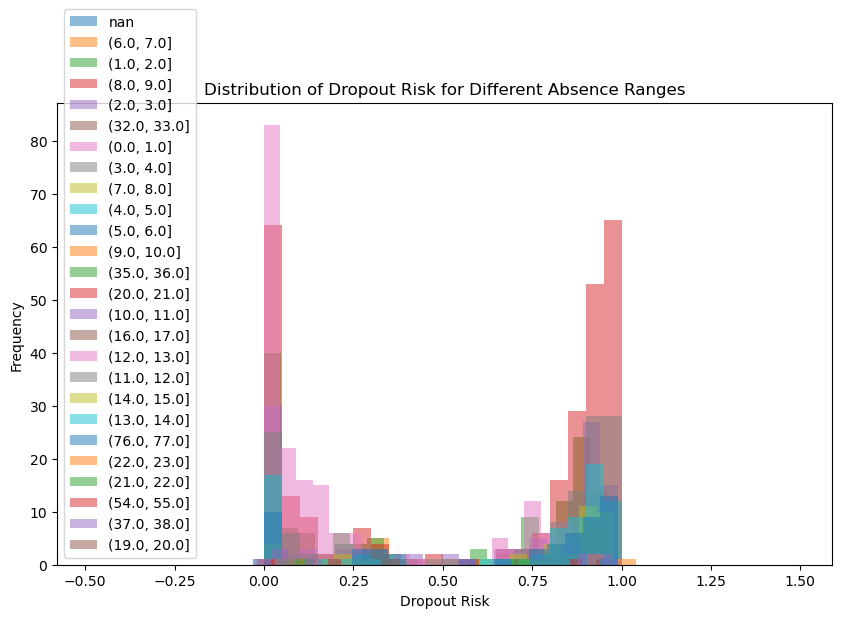

In [163]:


# Create a new column for absence ranges
X_test_df['AbsenceRange'] = pd.cut(X_test_df['ContinuousAbsenceSinceLastLogin'], bins=np.arange(0, X_test_df['ContinuousAbsenceSinceLastLogin'].max() + 1, 1))

# Plot histogram of 'DroppedOut_Probability' for each absence range
plt.figure(figsize=(10, 6))
for range in X_test_df['AbsenceRange'].unique():
    plt.hist(X_test_df[X_test_df['AbsenceRange'] == range]['DroppedOut_Probability'], bins=20, alpha=0.5, label=str(range))

plt.title('Distribution of Dropout Risk for Different Absence Ranges')
plt.xlabel('Dropout Risk')
plt.ylabel('Frequency')
plt.legend()
plt.show()




In [ ]:
dropout_rate_pathology = X_test_df[X_test_df['PathologyScore'] > 0]['DroppedOut_Probability'].mean()
dropout_rate_no_pathology = X_test_df[X_test_df['PathologyScore'] == 0]['DroppedOut_Probability'].mean()

plt.bar(['Pathology', 'No Pathology'], [dropout_rate_pathology, dropout_rate_no_pathology])
plt.ylabel('Dropout Risk')
plt.show()

print(dropout_rate_pathology)
print(dropout_rate_no_pathology)

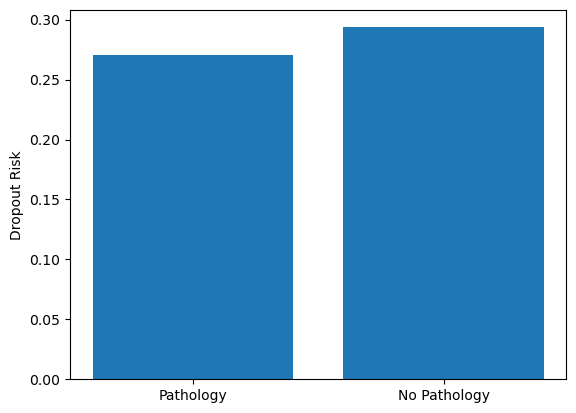

0.2708333333333333
0.29361914257228316


In [140]:
# Visualize Dropout Risk wrt Reported Pathology Total
dropout_rate_pathology = X_test_df[X_test_df['PathologyScore'] > 0]['DroppedOut_Probability'].mean()
dropout_rate_no_pathology = X_test_df[X_test_df['PathologyScore'] == 0]['DroppedOut_Probability'].mean()

plt.bar(['Pathology', 'No Pathology'], [dropout_rate_pathology, dropout_rate_no_pathology])
plt.ylabel('Dropout Risk')
plt.show()

print(dropout_rate_pathology)
print(dropout_rate_no_pathology)

In [ ]:
# Visualize Dropout Risk wrt Different Pathology Categories
dropout_rate_pathology = X_test_df[X_test_df['PathologyScore'] > 0]['DroppedOut_Probability'].mean()
dropout_rate_no_pathology = X_test_df[X_test_df['PathologyScore'] == 0]['DroppedOut_Probability'].mean()

plt.bar(['Pathology', 'No Pathology'], [dropout_rate_pathology, dropout_rate_no_pathology])
plt.ylabel('Dropout Risk')
plt.show()

print(dropout_rate_pathology)
print(dropout_rate_no_pathology)